### Objetivo: Imprementar un AG para encontrar el maximo de


In [1]:
import numpy as np
import matplotlib.pyplot as plt

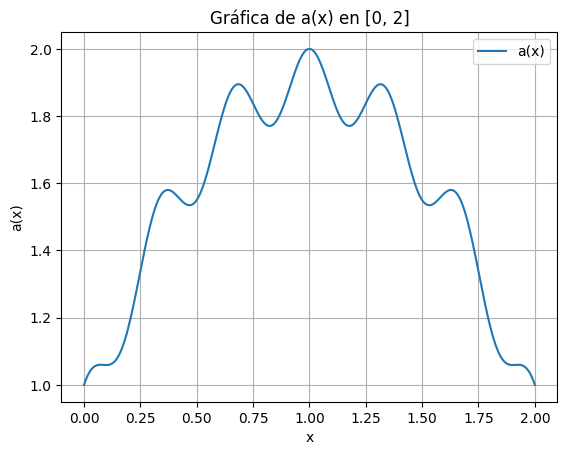

In [2]:

x = np.linspace(0, 2, 300)  # 300 puntos de 0 a 2, de manera que se puede observar mejor la función
y = - (0.1 + ((1 - x) ** 2) - 0.1 * np.cos(6 * np.pi * (1 - x))) + 2 # 

# Graficar
plt.plot(x, y, label='a(x)') # Gráfica de a(x)
plt.xlabel('x')
plt.ylabel('a(x)')
plt.title('Gráfica de a(x) en [0, 2]')
plt.grid(True)
plt.legend()
plt.show()


In [3]:
## Primera función para cerar una población de individuos en representación binaria
# Es una matriz de individuos
def crear_poblacion_binaria(n, l): 
    # n: numero de individuos
    # l: longitud de la representación binaria
    Poblacion =  np.random.randint(0, 2, size=(n, l))
    return Poblacion

In [4]:
P = crear_poblacion_binaria(10,8)
print(P)

[[0 1 0 0 1 0 1 0]
 [0 1 1 1 1 1 0 0]
 [0 1 0 0 0 0 1 0]
 [1 0 1 0 1 0 1 1]
 [1 0 1 0 0 1 0 1]
 [0 0 0 1 0 0 0 0]
 [0 1 0 0 0 0 1 0]
 [1 0 0 0 1 0 1 0]
 [0 0 0 1 0 1 0 0]
 [0 0 1 1 1 0 0 0]]


In [5]:
# Función para decodificar de binario a decimal los individuos
def decodificar(P, Imin, Imax):
    # P: población de individuos
    # Imin: Intervalo minimo 
    # Imax: Intervalo maximo
    [r, c] = P.shape # r: numero de individuos, c: longitud de la representación binaria
    decimal = np.zeros(r)
    decimalRescalado = np.zeros(r)

    for i in range(r):
        for j in range(c):
            # Se transforma de binario a decimal entero
            decimal[i] = decimal[i] + P[i, j] * 2 ** (c - j - 1)
            # Se reescala el valor decimal en el espacio de busqueda (0 a 2)
            decimalRescalado [i] = (Imax - Imin) * decimal[i] / (2 ** c - 1) + Imin
    return decimalRescalado

In [6]:
P = crear_poblacion_binaria(10, 8)
D = decodificar(P, 0, 2)
print(D)

[1.70980392 1.11372549 1.52941176 1.8745098  1.99215686 1.92156863
 0.26666667 1.55294118 0.41568627 0.29019608]


In [7]:
# Función para obtener la aptitudes (Fitness) de los individuos
def Fitness(Poblacion, Imin, Imax):
    [r, c] = Poblacion.shape
    x = decodificar(Poblacion, Imin, Imax)
    fitness = - (0.1 + ((1 - x) ** 2) - 0.1 * np.cos(6 * np.pi * (1 - x))) + 2 # Función objetivo
    return fitness


In [8]:
P = crear_poblacion_binaria(10,8)
print(P)
aptitudes = Fitness(P, 0, 2)
print(aptitudes)

[[1 0 1 1 0 0 0 1]
 [0 1 1 0 0 0 0 0]
 [1 1 0 0 1 0 0 1]
 [0 0 0 0 0 1 1 1]
 [1 0 0 0 0 1 1 1]
 [1 1 0 0 0 1 1 0]
 [1 0 0 1 0 0 0 0]
 [1 0 1 1 1 0 1 1]
 [1 0 0 0 1 0 0 0]
 [1 1 1 0 0 0 0 0]]
[1.80033648 1.83342079 1.55478174 1.05785282 1.94111363 1.54005072
 1.80691277 1.60132052 1.92645725 1.31425886]


In [9]:
# FUNCIÓN PARA REALIZAR LA CRUZA DE LOS INDIVIDUOS
def cruza (Poblacion, pc):
    [r, c] = Poblacion.shape
    # pc : Pares de cromosomas a cruzar
    M = np.zeros((int(2 * pc), c)) # Matriz auxiliar para guardar los descendientes para guardar el doble 
    # de la población a cruzar
    for i in range(int(pc)):
        r1 = np.random.randint(0, r, size=(1, 2)) # Selección aleatoria de dos padres
        
        # Seleccionamos los padres a cruzar
        padre1 = Poblacion[r1[0, 0], :]
        padre2 = Poblacion[r1[0, 1], :]

        # Selección del punto de cruza
        r2 = np.random.randint(0, c)

        # Se crean los desendientes
        hijo1 = np.concatenate((padre1[0:r2], padre2[r2:]))
        hijo2 = np.concatenate((padre2[0:r2], padre1[r2:]))

        # Se guardan los descendientes en la matriz auxiliar
        M[2 * i, :] = hijo1
        M[2 * i + 1, :] = hijo2
    return M




In [10]:
# Prondado
P = crear_poblacion_binaria(10,8)
print(P)
aptitudes = Fitness(P, 0, 2)
print(aptitudes)
M = cruza(P, 5)
print(M)

[[0 1 1 0 1 0 0 0]
 [1 0 0 1 0 1 1 0]
 [1 1 1 1 1 0 0 0]
 [1 1 1 1 0 0 1 0]
 [1 1 1 0 0 1 1 1]
 [0 0 0 0 0 1 1 0]
 [1 0 0 1 1 0 0 1]
 [1 0 0 1 0 0 0 1]
 [0 1 0 1 0 0 1 0]
 [0 0 0 0 1 0 1 0]]
[1.77151007 1.77056082 1.05785282 1.05913068 1.14918936 1.05507421
 1.7790983  1.79613938 1.8629737  1.0599381 ]
[[1. 0. 0. 1. 1. 0. 0. 0.]
 [0. 1. 1. 0. 1. 0. 0. 1.]
 [1. 0. 0. 0. 0. 1. 1. 0.]
 [0. 1. 1. 1. 1. 0. 0. 0.]
 [0. 1. 0. 1. 0. 0. 0. 0.]
 [0. 1. 1. 0. 1. 0. 1. 0.]
 [1. 0. 0. 0. 1. 0. 1. 0.]
 [0. 0. 0. 1. 1. 0. 0. 1.]
 [1. 1. 1. 0. 0. 1. 1. 1.]
 [1. 1. 1. 1. 1. 0. 0. 0.]]


In [11]:
# Función que realiza la mutación de cromosomas
def mutacion(Poblacion, pm):
    # pm: probabilidad de mutación en decimal, no se debe de exeder del 5%
    [r, c] = Poblacion.shape
    n = int(pm * c) 
    for i in range(n):
        r1 = np.random.randint(0, r) # Numero aleatorio para seleccionar cual individuo va mutar
        r2 = np.random.randint(0, c) # Numero aleatorio para seleccionar el gen a mutar (0 o un 1)
        
        # Comparamos el gen del individiuo y lo cambiamos a su contrario 0 -> 1 ^ 1 -> 0
        if (Poblacion[r1, r2] == 0):
            Poblacion[r1, r2] = 1
        else:
            Poblacion[r1, r2] = 0

    return Poblacion

    
    

In [12]:
# Función que realiza el proceso de selección por ranking (LR):
def seleccionRanking(poblacion, ps, Imin, Imax):
    # ps: Porcentaje de selección 
    [r, c] = poblacion.shape
    pnew = np.zeros((r, c)) # Individuos que pasan a la siguiente generación
    n = int(ps * r) # No inidica cuales son los individuos que vamos a seleccionar
    aptitud  = Fitness(poblacion, Imin, Imax).reshape(r, 1)  # Se agrega una columna para guardar su valor Fitness
    poblacionAmpliada = np.concatenate([poblacion, aptitud], axis= 1) # axis = 0 -> son los renglones, 1 son las columnas
    indices = np.argsort(poblacionAmpliada[:,-1])[::-1]
    # Le indicamos con la función argsort que ordene nuesta poblacion, pero como ordena de menos a mayor
    # agregamos el [::1] para que invierta el orden 

    poblacionOrdenada = poblacionAmpliada[indices] 
    # Matriz apartir de los indices que ya tenemos

    poblacionOrdenadaSeleccionada = poblacionOrdenada[0:n, :]
    # Seleccionamso hasta el limite establecido "n"    
    
    poblacionLimpia = poblacionOrdenadaSeleccionada[:,0:c] 
    # Quitamos el indice de aptitud para quedarnos solo con la población

    for i in range(r):
        for j in range(c):
            if (i < n):
                pnew[i,j] = poblacionLimpia[i,j]
                # Insertamos la población nueva a la matriz de selección
            else:
                pnew[i, j] = np.random.randint(0,2)
                # Cuando se acaba, rellenamos con numeros aleatorios
    return pnew


In [28]:
# Implementación del algoritmo genetico
print("Algoritmo genetico: Representación binarria\n")

#***************PARAMETROS DE INICIO*****************************
n = 50             # Cantidad de población
l = 8               # Cantidad de genes
generaciones = 100  # Numero de generaciones a realizar
ps = 0.6            # Porcentaje de selección no aleatoria
pc = n/2            # Pares a cruzar (cruza la mitad)
pm = 0.5            # Porcentaje de mutación (0.1 a 0.5 estandar)
Imin = 0            # Espacio de busqueda minima y de rescalar
Imax = 2            # Espacio de busqueda maxima y de rescalar

#*****************ALGORITMO GENETICO******************************
poblacion = crear_poblacion_binaria(n, l)
for i in range(generaciones):
    pCruzar = cruza(poblacion, pc)
    pMutada = mutacion(pCruzar, pm)
    pSelecc = seleccionRanking(pMutada, ps, Imin, Imax)
    poblacion = pSelecc.copy()

#*****************RESULTADOS*************************************

pMejorDecimal = decodificar(pSelecc, Imin, Imax)
mejorIndividuo = pMejorDecimal[0]
print(f"El mejor individuo es: {poblacion[0,:]}")
print(f"En decimal es: {mejorIndividuo}")





Algoritmo genetico: Representación binarria

El mejor individuo es: [1. 0. 0. 0. 0. 0. 0. 1.]
En decimal es: 1.011764705882353
